In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import math
from IPython.display import display

In [14]:
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
df_city = pd.read_csv('./study_data/score/城市信息+排名得分综合表.csv')[['name', 'pro_name', 'ARI']]
df_pro = pd.read_csv('./study_data/省英文名称.csv')

merged_df = pd.merge(df_city , df_pro, on='pro_name', how='left')
merged_df = merged_df.rename(columns={'en_name': 'pro_en_name', 'en_short': 'pro_en_short'})

# 计算中位数
province_medians = merged_df.groupby('pro_name')['ARI'].median().reset_index()
province_medians = province_medians.rename(columns={'ARI': 'ARI_median'})
province_medians['ARI_median'] = province_medians['ARI_median'].round(2)

df_final = merged_df.merge(province_medians, on='pro_name', how='left')
df_final = df_final.sort_values(by='ARI_median', ascending=False)
df_final

,name,pro_name,ARI,pro_en_name,pro_en_short,ARI_median
0,北京市,北京市,100.000000,Beijing,BJ,100.00
1,上海市,上海市,80.683000,Shanghai,SH,80.68
5,香港特别行政区,香港特别行政区,64.009156,Hong Kong,HK,64.01
7,重庆市,重庆市,61.384192,Chongqing,CQ,61.38
8,天津市,天津市,59.424399,Tianjin,TJ,59.42
...,...,...,...,...,...,...
284,阿克苏地区,新疆维吾尔自治区,15.571582,Xinjiang,XJ,13.43
185,喀什地区,新疆维吾尔自治区,24.374827,Xinjiang,XJ,13.43
154,巴音郭楞蒙古自治州,新疆维吾尔自治区,26.942637,Xinjiang,XJ,13.43
41,乌鲁木齐市,新疆维吾尔自治区,50.543016,Xinjiang,XJ,13.43


# Box plots

,pro_en_name,ARI_median
0,Beijing,100.00
1,Shanghai,80.68
2,Hong Kong,64.01
3,Chongqing,61.38
4,Tianjin,59.42
5,Macau,57.27
6,Taiwan,56.68
7,Zhejiang,46.68
8,Jiangsu,46.30
9,Guangdong,44.90


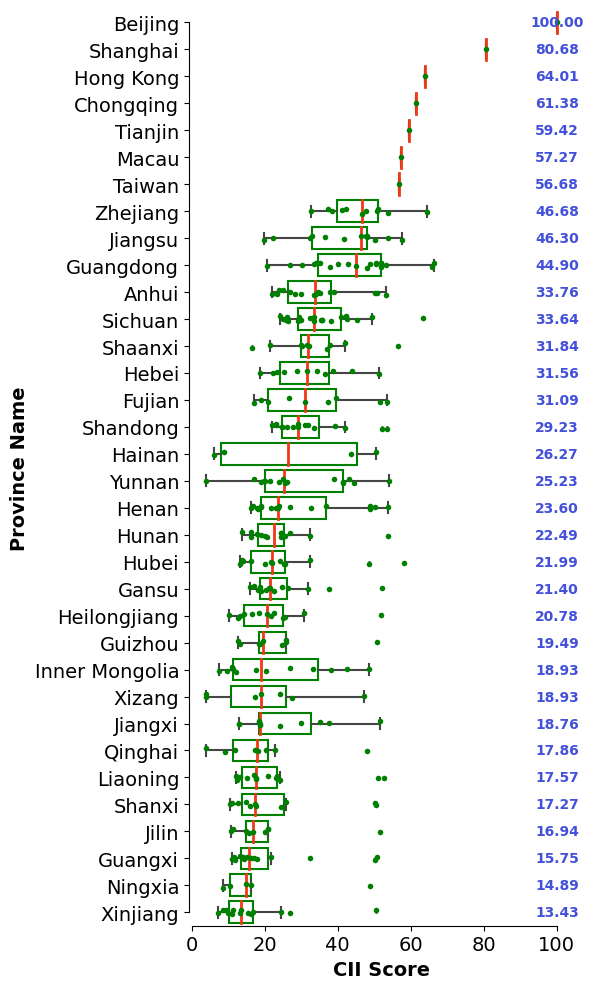

In [11]:
def box_plots():
    # 处理数据
    plt.figure(figsize=(6, 10))
    
    # 设置 flierprops 参数
    flierprops = dict(marker='o', markerfacecolor='green', markersize=1, linestyle='none')
    # 设置 boxprops 参数
    boxprops = dict(facecolor='none', edgecolor='green')
    medianprops = dict(color='#F13817', linewidth=2)
    
    # 添加散点
    ax = sns.stripplot(y='pro_en_name', x='ARI', data=df_final, size=4, color='green', jitter=True)
    # 绘制盒形图
    sns.boxplot(y='pro_en_name', x='ARI', data=df_final, boxprops=boxprops,
                medianprops=medianprops,
                flierprops=flierprops, ax=ax)
    
    # 中位数注释
    df_median = df_final[['pro_en_name', 'ARI_median']].drop_duplicates().reset_index(drop=True)
    medians = df_median['ARI_median'].tolist()
    for i, median in enumerate(medians):
        ax.text(100, i, f'{median:.2f}', ha='center', va='center', fontweight='600', color='#4351DA', fontsize=10)
        
    t_t = df_median[df_median.ARI_median > 25.48]
    display(t_t)
    
        
    sns.despine(offset=0, trim=True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.xlabel('CII Score', fontsize=14, fontweight=600)
    plt.ylabel('Province Name', fontsize=14, fontweight=600)
    
    
    plt.tight_layout() 
    plt.savefig('./地图_QGIS/box_plots/' + 'province' + '_box_plot.pdf', format='pdf', dpi=600,)
    plt.show()

box_plots()

# Data for map

In [15]:
df_unique = df_final.drop_duplicates(subset='pro_name')
df_unique = df_unique.drop(columns='name')
df_unique = df_unique.reset_index(drop=True)
df_unique = df_unique.rename(columns={'pro_en_name': 'en_name'})
df_unique.to_csv('./地图_QGIS/省级CII-rank.csv', index=None)
df_unique

,pro_name,ARI,en_name,pro_en_short,ARI_median
0,北京市,100.000000,Beijing,BJ,100.00
1,上海市,80.683000,Shanghai,SH,80.68
2,香港特别行政区,64.009156,Hong Kong,HK,64.01
3,重庆市,61.384192,Chongqing,CQ,61.38
4,天津市,59.424399,Tianjin,TJ,59.42
5,澳门特别行政区,57.266357,Macau,MO,57.27
6,台湾省,56.677535,Taiwan,TW,56.68
7,浙江省,53.747870,Zhejiang,ZJ,46.68
8,江苏省,32.925726,Jiangsu,JS,46.30
9,广东省,44.901582,Guangdong,GD,44.90
